Homework 4: Sentiment Analysis
----

Names & Sections
----
Names: __Alex Kramer (6120)__

Neural Networks (20 points)
----

Next, we'll train a feedforward neural net to work with this data. You'll train one neural net which takes the same input as your Logistic Regression model - a sparse vector representing documents as bags of words.

In [1]:
import sentiment_utils as sutils
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense

# you can experiment with having some Dropout layers if you'd like to
# this is not required
from keras.layers import Dropout

# if you want to use this again
from sklearn.feature_extraction.text import CountVectorizer



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alexkramer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
2023-10-25 18:19:54.699667: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# define constants for the files we are using
TRAIN_FILE = "movie_reviews_train.txt"
DEV_FILE = "movie_reviews_dev.txt"

# load in your data and make sure you understand the format
# Do not print out too much so as to impede readability of your notebook
train_tups = sutils.generate_tuples_from_file(TRAIN_FILE)
dev_tups = sutils.generate_tuples_from_file(DEV_FILE)

In [3]:
# you may use either your sparse vectors or sklearn's CountVectorizer's sparse vectors
# you will experiment with multinomial and binarized representations later

#vectorizer = CountVectorizer(input='content', stop_words='english', binary=True)
vectorizer = sutils.vectorizer
xtrain = vectorizer.fit_transform([' '.join(text) for text in train_tups[0]]).toarray()
xtrainsub = vectorizer.transform([' '.join(text) for text in train_tups[0][:160]]).toarray()
xdev = vectorizer.transform([' '.join(text) for text in dev_tups[0]]).toarray()
ytrain = np.asarray(train_tups[1])
ydev = np.asarray(dev_tups[1])

In [10]:
# Create a feedforward neural network model
# that takes a sparse BoW representation of the data as input
# and makes a binary classification of positive/negative sentiment as output

# you may use any number of hidden layers >= 1 and any number of units in each hidden layer
# (we recommend between 50-200)
# you may use any activation function on the hidden layers
# you should use a sigmoid activation function on the output layer
# you should use binary cross-entropy as your loss function
# sgd is an appropriate optimizer for this task
# you should report accuracy as your metric
# you may add Dropout layers if you'd like to

# create/compile your model in this cell
# can play around with the parameters below to change the model 
model = Sequential(
[Dense(50, activation="relu", name="1"),
 Dense(200, activation="relu", name="2"),
 Dense(2, activation ='sigmoid', name="3")]
)

loss_fn = 'sparse_categorical_crossentropy'
model.compile(loss=loss_fn, optimizer='sgd')

How many trainable parameters does your model have? __We have around 4500402__

In [11]:
# train your model
# Felix's computer takes about 2 sec for 3 epochs
# reports an accuracy of 0.78 at that point using the sgd optimizer
#classification = model.predict(xtrain[1200:]) #[model.predict(x_val) for x_val in xtrain[1200:]]

# Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, (<class 'list'> containing values of types {"<class 'int'>"})
# indicates you should change a list into a numpy array

# make a prediction on the dev set
# then make a classification decision based on that prediction
# predicting all examples takes < 1 sec on Felix's computer
classification = [round(x) for x in model.predict(xdev)[0]] 
print(classification)
print(len(classification))


7/7 [==============================] - 0s 4ms/step
[0, 1]
2


Epoch 1/3
3/3 [==============================] - 1s 116ms/step - loss: 0.6903 - val_loss: 0.6923
Epoch 2/3
3/3 [==============================] - 0s 36ms/step - loss: 0.6872 - val_loss: 0.6920
Epoch 3/3
3/3 [==============================] - 0s 39ms/step - loss: 0.6841 - val_loss: 0.6917
Epoch 1/3
5/5 [==============================] - 0s 43ms/step - loss: 0.6848 - val_loss: 0.6912
Epoch 2/3
5/5 [==============================] - 0s 26ms/step - loss: 0.6820 - val_loss: 0.6906
Epoch 3/3
5/5 [==============================] - 0s 25ms/step - loss: 0.6792 - val_loss: 0.6901
Epoch 1/3
8/8 [==============================] - 0s 29ms/step - loss: 0.6802 - val_loss: 0.6891
Epoch 2/3
8/8 [==============================] - 0s 18ms/step - loss: 0.6767 - val_loss: 0.6881
Epoch 3/3
8/8 [==============================] - 0s 20ms/step - loss: 0.6729 - val_loss: 0.6869
Epoch 1/3
10/10 [==============================] - 0s 25ms/step - loss: 0.6728 - val_loss: 0.6854
Epoch 2/3
10/10 [====================

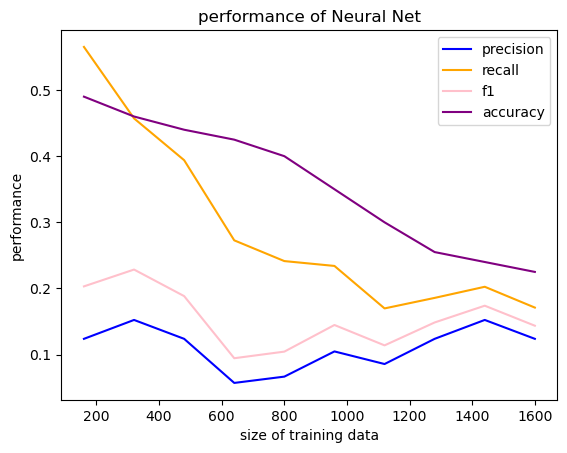

In [12]:
# create the same graph as with NB and LR, with your neural network model instead!
# make sure to re-create your model each time you train it — you don't want to start with
# an already trained network!

# For a model with one hidden layer of 50 units:
# Takes < 15 sec to run on Felix's computer w/ 3 epochs
# Takes < 30 sec to run on Felix's computer w/ 10 epochs
# Takes < 50 sec to run on Felix's computer w/ 20 epochs
# you need not train your model more than 20 epochs
# you should experiment with different numbers of epochs to see how performance varies
# you need not create an experiment that takes > 10 min to run (please do not do this)

sutils._create_training_graph(sutils.get_prfa, train_tups, dev_tups, model, 'Neural Net', savepath='Neural Nets - Graph 1.png', verbose=False)
# use the model.evaluate function to report the loss and accuracy on the dev set
# set verbose = true

Report the f1 scores for your model with the following settings, using the same number of epochs to train in both cases:
- number of epochs used: __3__
- multinomial features: __Around 0.57__
- binarized features: __Around 0.68__


### Twitter Dataset

In [2]:
def make_feats(data_tups):
    feats_set = []
    for text in data_tups[0]:
        feats_set.append(word_feats(preprocessing(text)))
    return feats_set, data_tups[1]

In [6]:
data = sutils.generate_tuples_from_file("twitter.csv", delin=",", header=["id","label","tweet"], hasheading=True)
vectorizer = sutils.vectorizer
vectorizer.fit_transform([' '.join(text) for text in data[0]])
# split the data into train set and dev set, this process is not random
X_train, X_dev, y_train, y_dev = sutils.train_dev_split(data, train_ratio=0.8)

Epoch 1/3
35/35 [==============================] - 5s 138ms/step - loss: 0.5924 - val_loss: 0.4977
Epoch 2/3
35/35 [==============================] - 2s 53ms/step - loss: 0.4343 - val_loss: 0.3861
Epoch 3/3
35/35 [==============================] - 1s 43ms/step - loss: 0.3472 - val_loss: 0.3237
Epoch 1/3
69/69 [==============================] - 6s 83ms/step - loss: 0.2932 - val_loss: 0.2717
Epoch 2/3
69/69 [==============================] - 3s 39ms/step - loss: 0.2602 - val_loss: 0.2531
Epoch 3/3
69/69 [==============================] - 2s 29ms/step - loss: 0.2478 - val_loss: 0.2452
Epoch 1/3
103/103 [==============================] - 7s 67ms/step - loss: 0.2407 - val_loss: 0.2408
Epoch 2/3
103/103 [==============================] - 3s 30ms/step - loss: 0.2378 - val_loss: 0.2391
Epoch 3/3
103/103 [==============================] - 3s 25ms/step - loss: 0.2365 - val_loss: 0.2383
Epoch 1/3
137/137 [==============================] - 8s 54ms/step - loss: 0.2334 - val_loss: 0.2375
Epoch 2/3
1

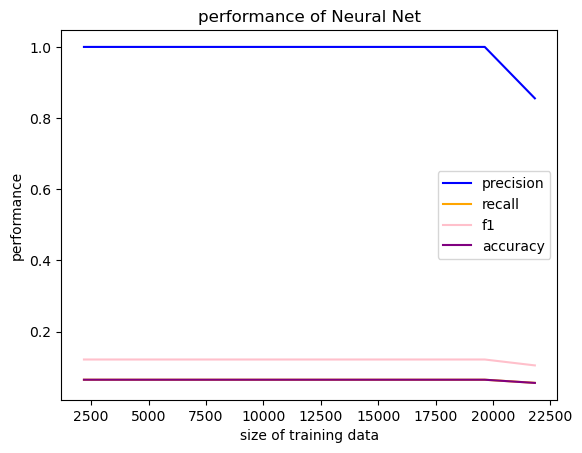

In [7]:
## This took over an hour to run

model = Sequential(
[Dense(50, activation="relu", name="1"),
 Dense(200, activation="relu", name="2"),
 Dense(2, activation ='sigmoid', name="3")]
)

loss_fn = 'sparse_categorical_crossentropy'
model.compile(loss=loss_fn, optimizer='sgd')
model = Sequential(
[Dense(50, activation="relu", name="1"),
 Dense(200, activation="relu", name="2"),
 Dense(2, activation ='sigmoid', name="3")]
)

loss_fn = 'sparse_categorical_crossentropy'
model.compile(loss=loss_fn, optimizer='sgd')
sutils._create_training_graph(sutils.get_prfa, (X_train, y_train), (X_dev, y_dev), model, 'Neural Net', savepath='Neural Nets - Graph 1.png', verbose=False)
